In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# TASK 1: Data Preprocessing

In [2]:
df = pd.read_csv('DS1_C9_S6_Practice_Vehicle_Data.csv')
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Vehicle_type       157 non-null    object 
 3   Engine_size        156 non-null    float64
 4   Horsepower         156 non-null    float64
 5   Wheelbase          156 non-null    float64
 6   Width              156 non-null    float64
 7   Length             156 non-null    float64
 8   Curb_weight        155 non-null    float64
 9   Fuel_capacity      156 non-null    float64
 10  Fuel_efficiency    154 non-null    float64
 11  Latest_Launch      157 non-null    object 
 12  Power_perf_factor  155 non-null    float64
dtypes: float64(9), object(4)
memory usage: 16.1+ KB


# Missing value treatment.

In [4]:
df.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Latest_Launch        0
Power_perf_factor    2
dtype: int64

In [5]:
def missing_value_treater(df):
    for col_name in df.columns:
        col = df[col_name]
        if pd.api.types.is_numeric_dtype(col):
            median_value = col.median()
            df[col_name].fillna(median_value, inplace= True)
        else:
            print(f'Column "{col_name}" is not numeric, no missing values treated.')
    return df               

In [6]:
missing_value_treater(df)

Column "Manufacturer" is not numeric, no missing values treated.
Column "Model" is not numeric, no missing values treated.
Column "Vehicle_type" is not numeric, no missing values treated.
Column "Latest_Launch" is not numeric, no missing values treated.


,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,72.030917
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [7]:
df.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
dtype: int64

# Outlier Treatment

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Engine_size'),
  Text(1, 0, 'Horsepower'),
  Text(2, 0, 'Wheelbase'),
  Text(3, 0, 'Width'),
  Text(4, 0, 'Length'),
  Text(5, 0, 'Curb_weight'),
  Text(6, 0, 'Fuel_capacity'),
  Text(7, 0, 'Fuel_efficiency'),
  Text(8, 0, 'Power_perf_factor')])

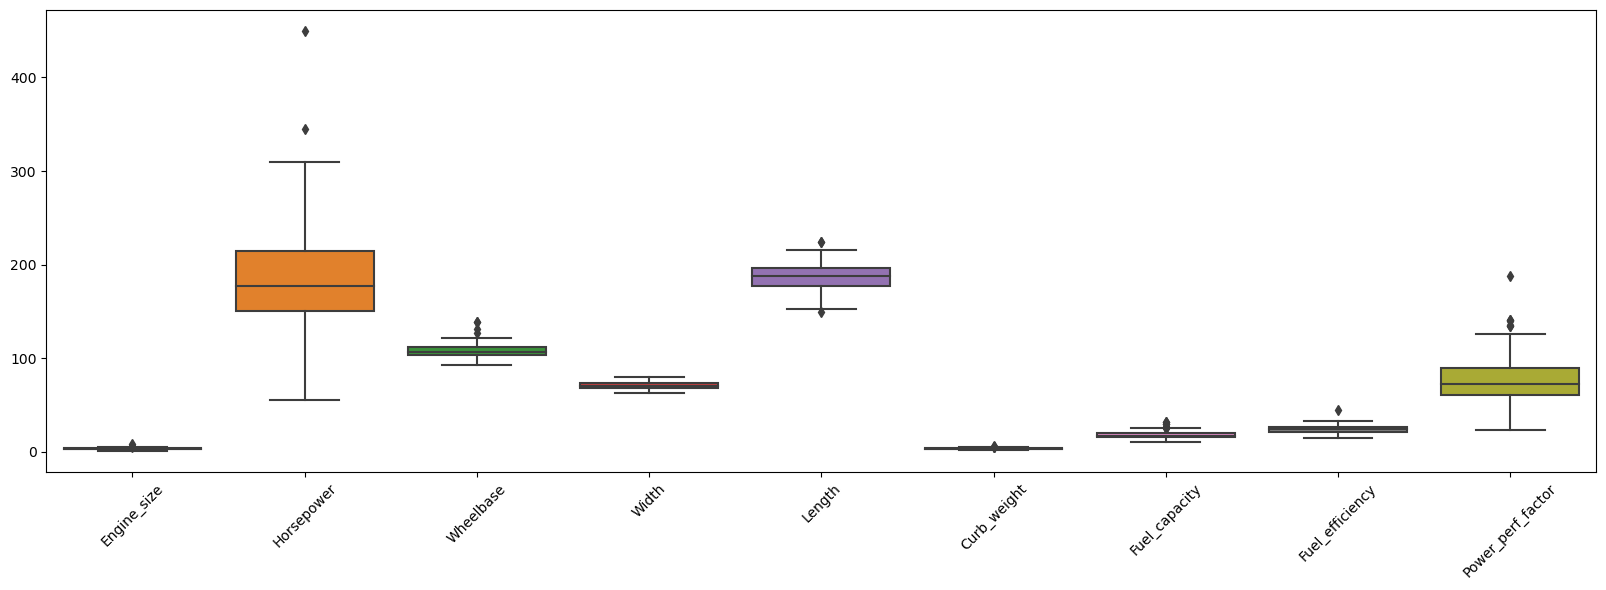

In [9]:
sns.boxplot(data = df)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

In [13]:
import pandas as pd

def iqr_winsorization(df, thresh=1.5):
    # Create a copy to avoid modifying original data
    df_out = df.copy()

    for col_name in df_out.columns:
        col = df_out[col_name]
        
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(col):
            # Calculate IQR
            Q1 = col.quantile(0.25)
            Q3 = col.quantile(0.75)
            IQR = Q3 - Q1

            # Define fences
            lower_fence = Q1 - thresh * IQR
            upper_fence = Q3 + thresh * IQR

            # Winsorize outliers
            df_out.loc[df_out[col_name] < lower_fence, col_name] = lower_fence
            df_out.loc[df_out[col_name] > upper_fence, col_name] = upper_fence
        else:
            print(f'Column "{col_name}" is not numeric, no outliers treated.')

    return df_out


# Perform outlier treatment on all columns
treated_df = iqr_winsorization(df)
print(treated_df)


Column "Manufacturer" is not numeric, no outliers treated.
Column "Model" is not numeric, no outliers treated.
Column "Vehicle_type" is not numeric, no outliers treated.
Column "Latest_Launch" is not numeric, no outliers treated.
    Manufacturer    Model Vehicle_type  Engine_size  Horsepower  Wheelbase  \
0          Acura  Integra    Passenger          1.8       140.0      101.2   
1          Acura       TL    Passenger          3.2       225.0      108.1   
2          Acura       CL    Passenger          3.2       225.0      106.9   
3          Acura       RL    Passenger          3.5       210.0      114.6   
4           Audi       A4    Passenger          1.8       150.0      102.6   
..           ...      ...          ...          ...         ...        ...   
152        Volvo      V40    Passenger          1.9       160.0      100.5   
153        Volvo      S70    Passenger          2.4       168.0      104.9   
154        Volvo      V70    Passenger          2.4       168.0     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Engine_size'),
  Text(1, 0, 'Horsepower'),
  Text(2, 0, 'Wheelbase'),
  Text(3, 0, 'Width'),
  Text(4, 0, 'Length'),
  Text(5, 0, 'Curb_weight'),
  Text(6, 0, 'Fuel_capacity'),
  Text(7, 0, 'Fuel_efficiency'),
  Text(8, 0, 'Power_perf_factor')])

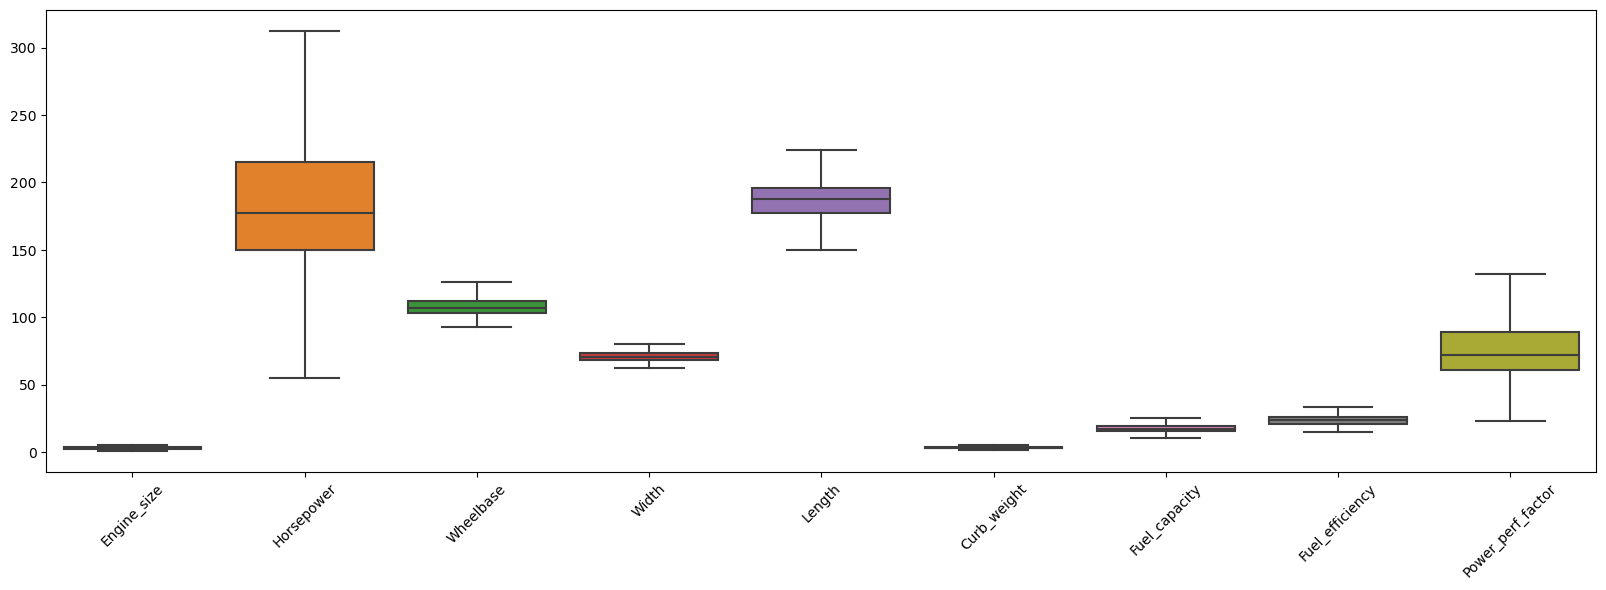

In [15]:
sns.boxplot(data = treated_df)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

# Multi- collinearity

In [34]:
df_selected =pd.concat([df.iloc[:, 3:11], df.iloc[:, 12]], axis=1)
df_selected

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


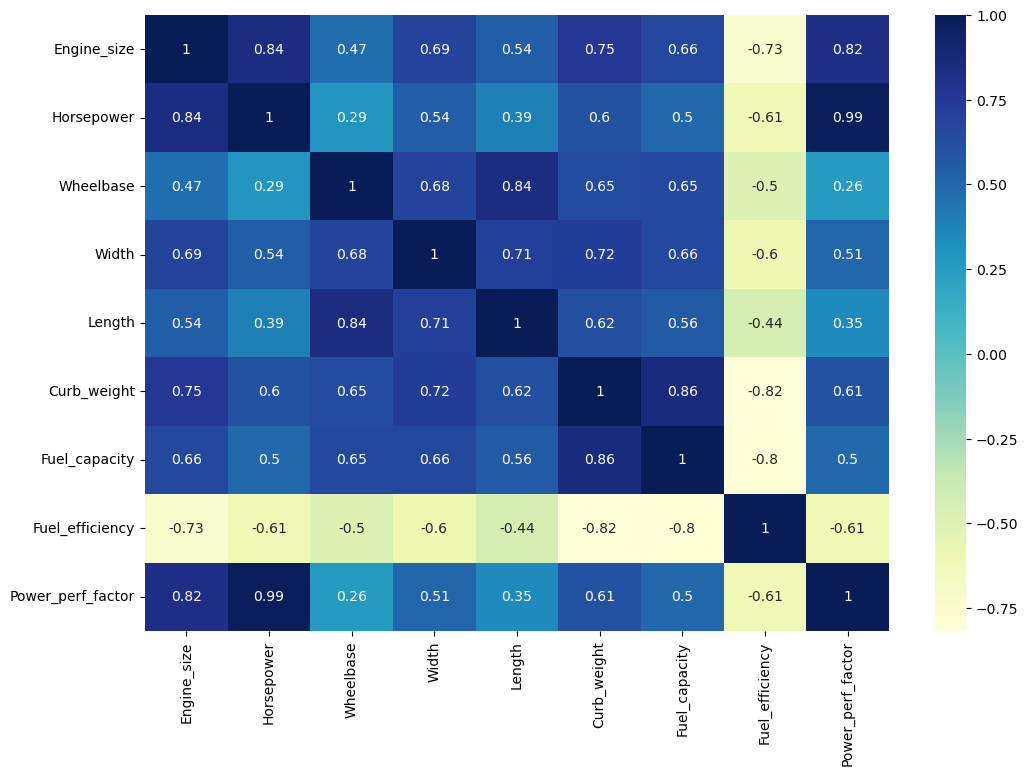

In [35]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(df_selected.corr(), annot=True, cmap="YlGnBu")

In [36]:
# Selecting the cutoff value as 0.7
abs(df_selected.corr())>=0.7

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Engine_size,True,True,False,False,False,True,False,True,True
Horsepower,True,True,False,False,False,False,False,False,True
Wheelbase,False,False,True,False,True,False,False,False,False
Width,False,False,False,True,True,True,False,False,False
Length,False,False,True,True,True,False,False,False,False
Curb_weight,True,False,False,True,False,True,True,True,False
Fuel_capacity,False,False,False,False,False,True,True,True,False
Fuel_efficiency,True,False,False,False,False,True,True,True,False
Power_perf_factor,True,True,False,False,False,False,False,False,True


# Data Scaling

In [40]:
cols = df_selected.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-1.214376,-0.814577,-0.827661,-1.121287,-1.119971,-1.182726,-1.228700,0.982264,-0.750757
1,0.134385,0.694066,0.081122,-0.246689,0.416070,0.223285,-0.193381,0.272684,0.577776
2,0.134385,0.694066,-0.076927,-0.159229,0.348634,0.148020,-0.193381,0.509211,-0.198687
3,0.423406,0.427835,0.937221,0.073997,0.693306,0.756545,0.013683,-0.436897,0.578539
4,-1.214376,-0.637089,-0.643270,-0.858907,-0.700370,-0.607830,-0.400444,0.745737,-0.570191


# TASK 2: Elbow Method & Silhouette Method

Elbow Method: This method involves plotting the explained variance (or inertia) for different values of 
𝐾
K and looking for a "knee" point where the rate of decrease sharply changes.

Silhouette Method: This method computes the silhouette score for various 
𝐾
K values. A higher silhouette score indicates a better-defined clustering.

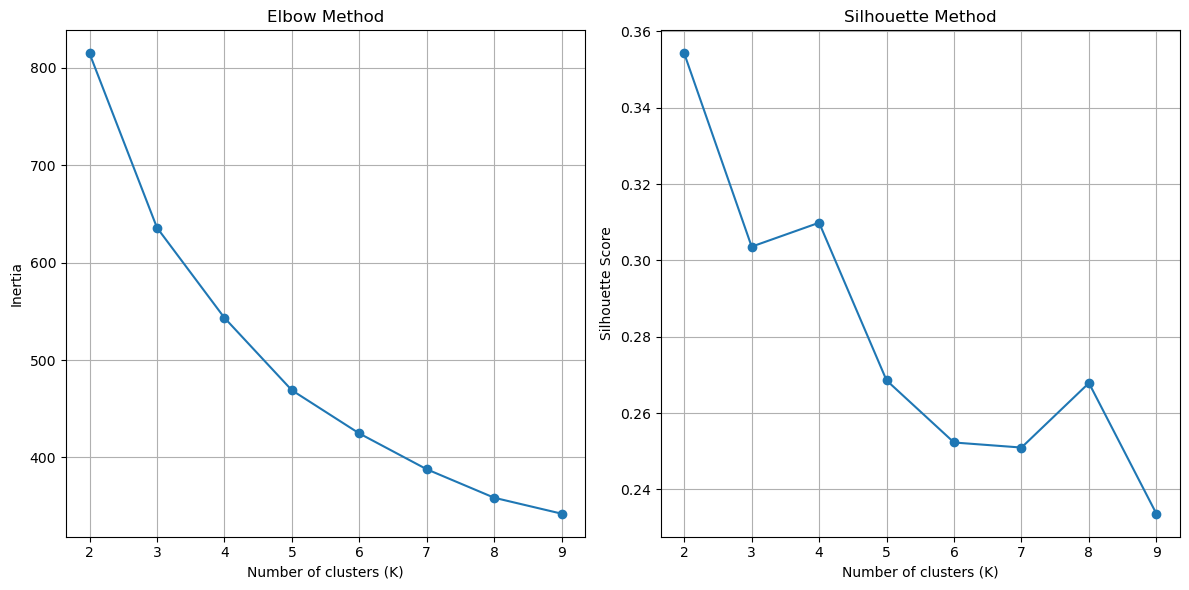

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of K values to test
k_values = range(2, 10)  # You can adjust this range as needed

# Lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for k in k_values:
    # Initialize KMeans with the current K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    # Append inertia
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

# Plotting the Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()


Interpretation: After analysing the Elbow method & Silhouette Method. Iam considering number of clusters as 3, because line plot in elbow is linear but showing slight tip at number of clusters= 3. Silhouette Score aslo bit better for 3 clusters.

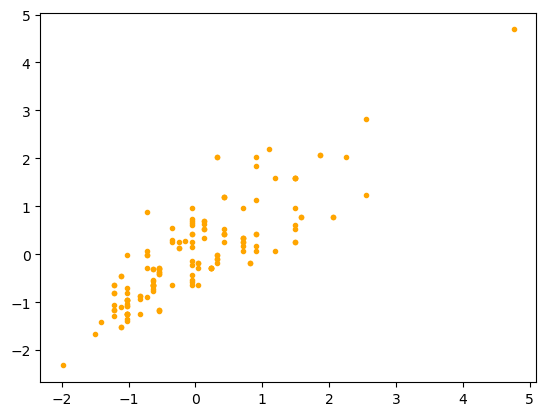

In [48]:
plt.scatter(df_scaled['Engine_size'], df_scaled['Horsepower'], marker='.', c= 'orange')

# TASK 3

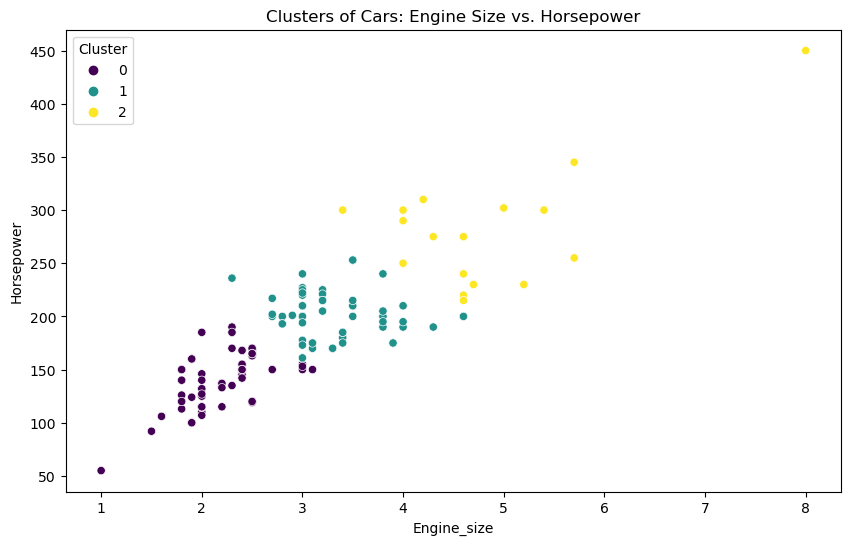

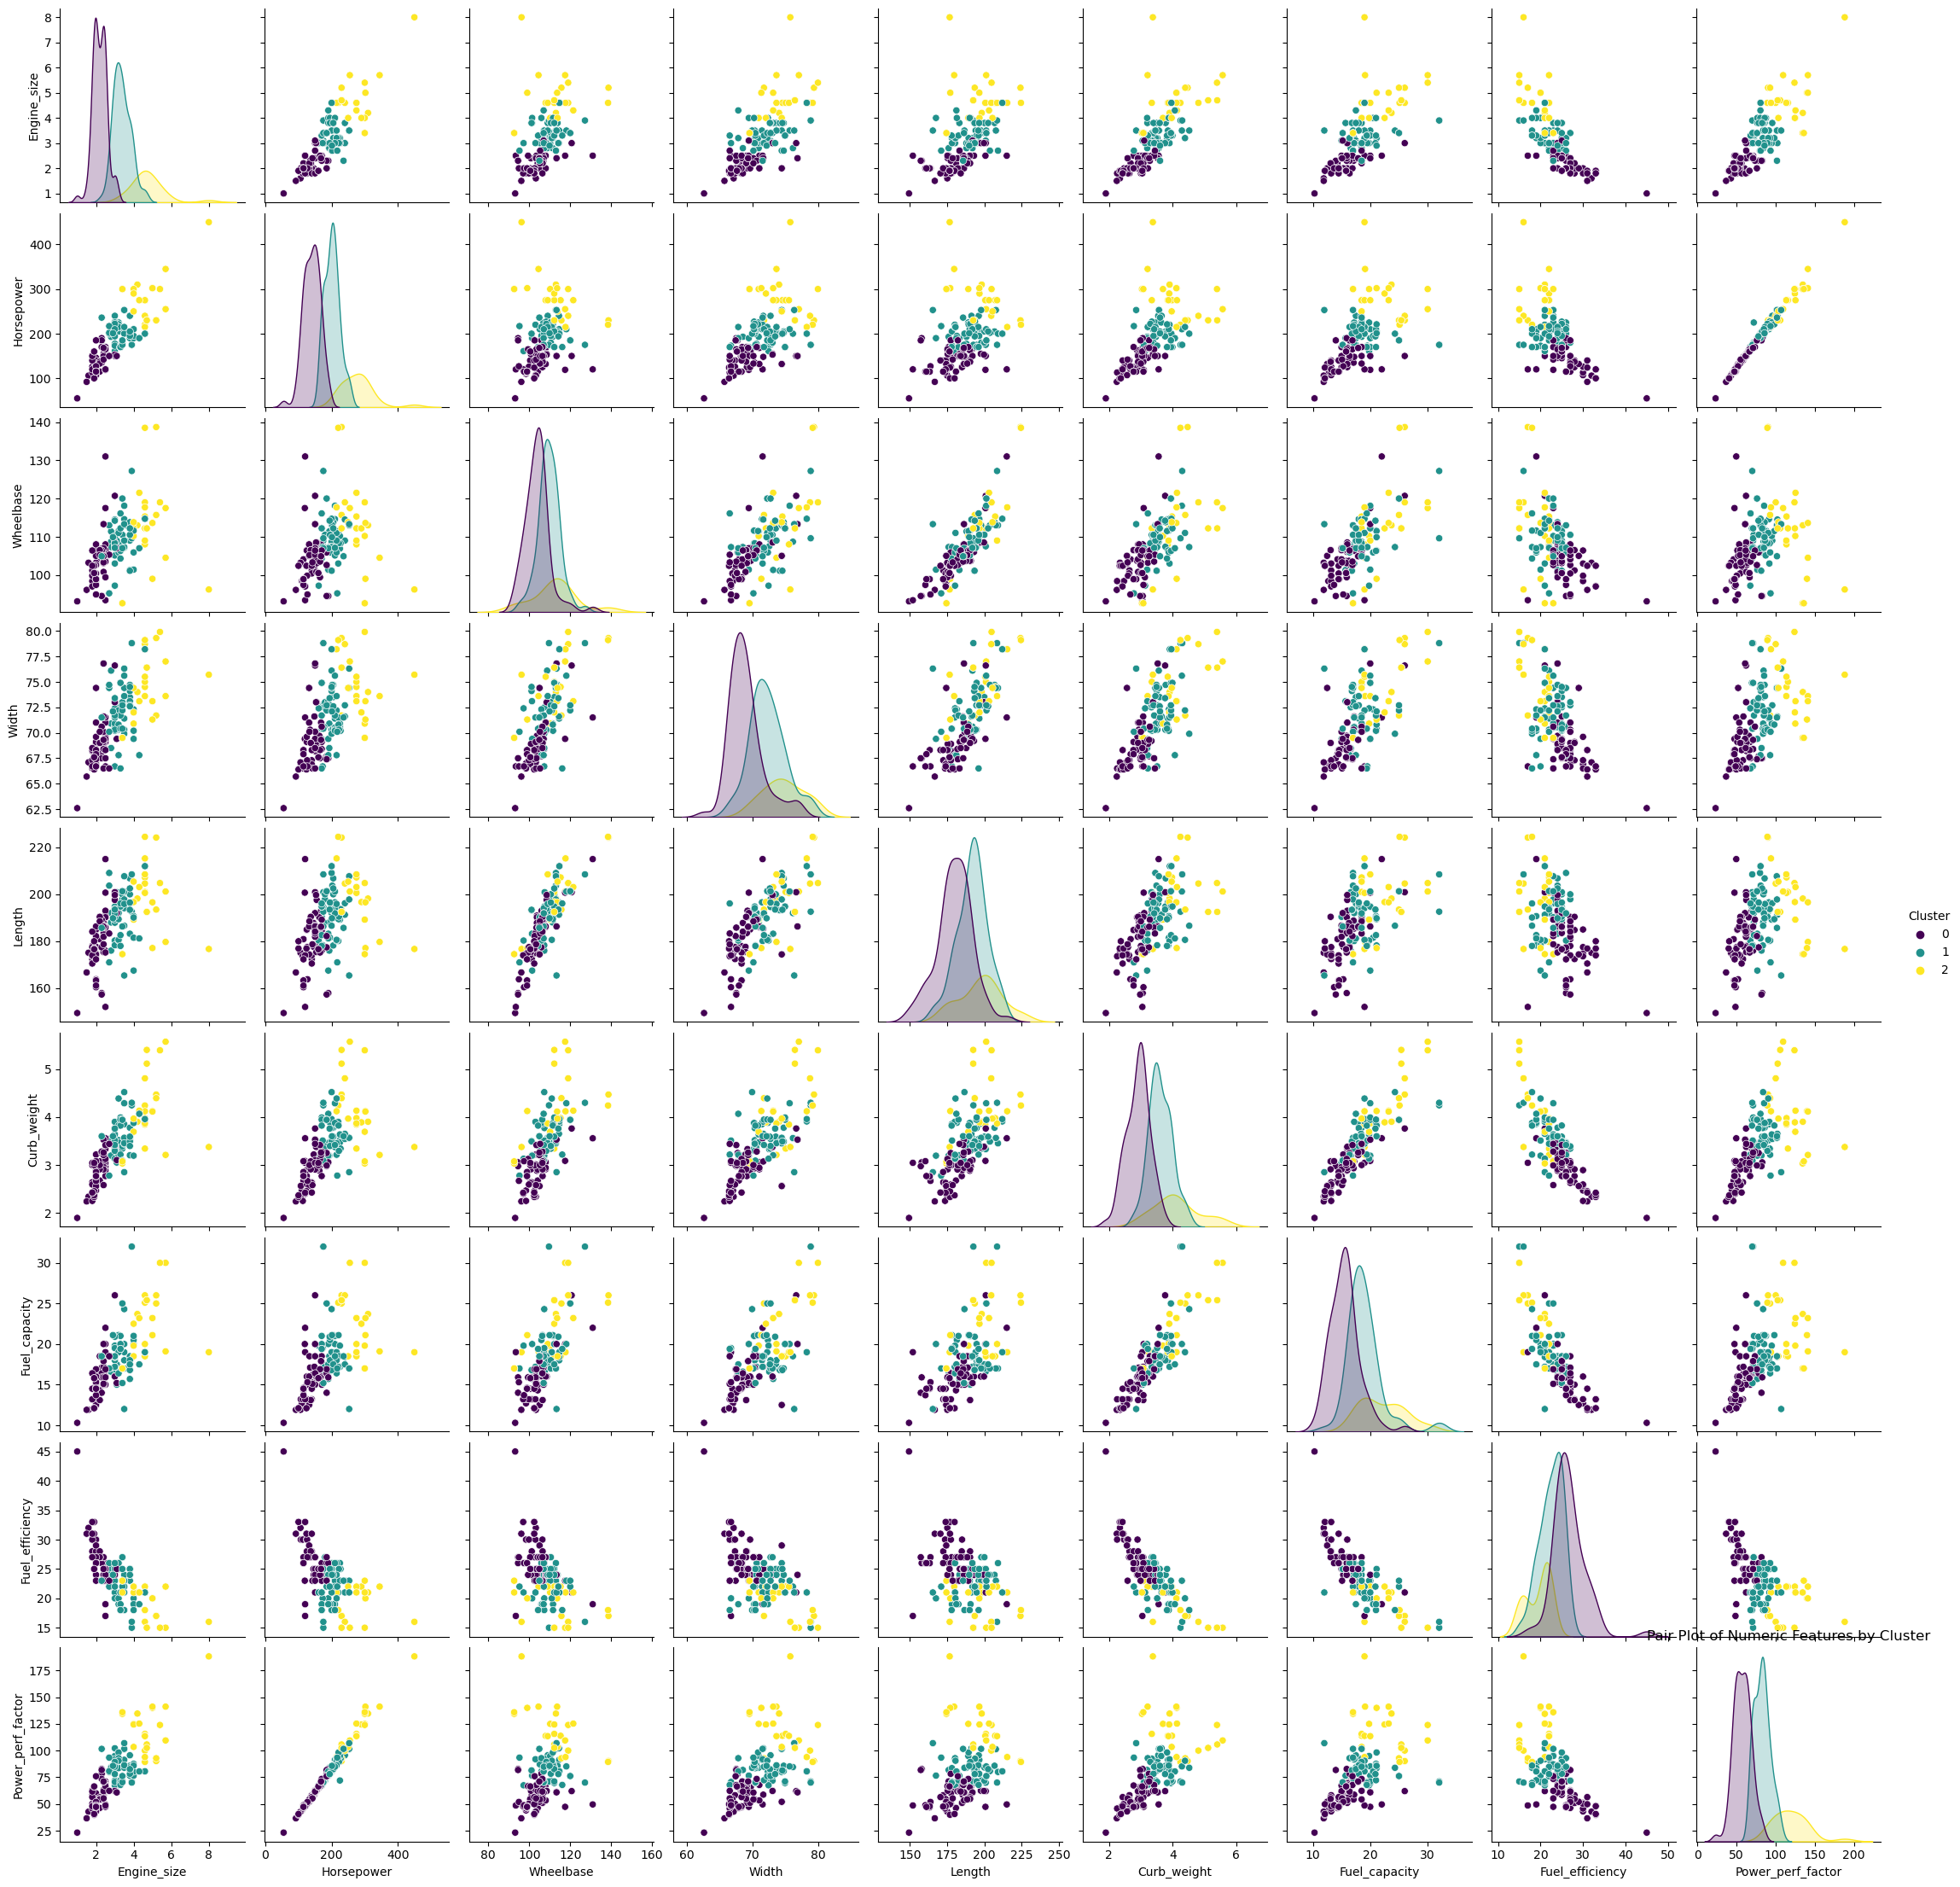

Cluster 0 unique car models:
['Integra' 'A4' '323i' 'Cavalier' 'Prizm' 'Metro' 'Sebring Coupe'
 'Sebring Conv.' 'Cirrus' 'Neon' 'Avenger' 'Stratus' 'Dakota' 'Caravan'
 'Escort' 'Contour' 'Taurus' 'Focus' 'Windstar' 'Ranger' 'Civic' 'Accord'
 'CR-V' 'Accent' 'Elantra' 'Sonata' 'Wrangler' 'Mirage' 'Eclipse' 'Galant'
 'Mystique' 'Cougar' 'Sable' 'C-Class' 'SLK' 'SLK230' 'Sentra' 'Altima'
 'Cutlass' 'Alero' 'Breeze' 'Voyager' 'Sunfire' '05-Sep' '03-Sep' 'SL'
 'SC' 'SW' 'LW' 'LS' 'Outback' 'Forester' 'Corolla' 'Camry' 'Celica'
 'Tacoma' 'RAV4' '4Runner' 'Golf' 'Jetta' 'Passat' 'Cabrio' 'GTI' 'Beetle'
 'S40' 'V40' 'S70' 'V70']

Cluster 1 unique car models:
['TL' 'CL' 'RL' 'A6' '328i' '528i' 'Century' 'Regal' 'Park Avenue'
 'LeSabre' 'Catera' 'Malibu' 'Lumina' 'Monte Carlo' 'Camaro' 'Impala'
 'Concorde' 'LHS' 'Town & Country' '300M' 'Intrepid' 'Ram Wagon' 'Ram Van'
 'Mustang' 'Crown Victoria' 'Explorer' 'Passport' 'Odyssey' 'I30' 'S-Type'
 'Cherokee' 'Grand Cherokee' 'ES300' 'GS300' 'RX300' '

In [71]:
original_df = pd.DataFrame(df)

# Step 1: Scale the data
features = original_df[['Engine_size', 'Horsepower']]  # Add other numeric features as needed
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

# Step 2: Fit the K-Means Model with the best K (replace 3 with your actual best K value)
best_k = 3  # Replace with your determined K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_scaled)

# Step 3: Add cluster labels to the original DataFrame
original_df['Cluster'] = kmeans.labels_

# Step 4: Visualize clusters for Engine Size vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=original_df, x='Engine_size', y='Horsepower', hue='Cluster', palette='viridis')
plt.title('Clusters of Cars: Engine Size vs. Horsepower')
plt.legend(title='Cluster')
plt.show()

# Step 5: Pair Plot for all numeric features
sns.pairplot(original_df, hue='Cluster', palette='viridis')
plt.title('Pair Plot of Numeric Features by Cluster')
plt.show()

# Step 6: Print cluster-wise unique car model names
for cluster in range(best_k):
    print(f"Cluster {cluster} unique car models:")
    unique_models = original_df[original_df['Cluster'] == cluster]['Model'].unique()
    print(unique_models)
    print()


# TASK 4

In [73]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

original_df = df_scaled
# Fit the K-Means Model (using best K found previously)
kmeans = KMeans(n_clusters= 3, random_state=42)  # Replace with your determined K value. Iam considering 3 clusters
kmeans.fit(df_scaled)

#cluster labels
labels = kmeans.labels_

# evaluation metrics
silhouette = silhouette_score(df_scaled, labels)
calinski_harabasz = calinski_harabasz_score(df_scaled, labels)
davies_bouldin = davies_bouldin_score(df_scaled, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

if silhouette > 0.5:
    silhouette_eval = "good"
elif silhouette > 0:
    silhouette_eval = "fair"
else:
    silhouette_eval = "poor"

if calinski_harabasz > 200:
    ch_eval = "very good"
elif calinski_harabasz > 100:
    ch_eval = "good"
else:
    ch_eval = "poor"

if davies_bouldin < 0.5:
    db_eval = "very good"
elif davies_bouldin < 1:
    db_eval = "good"
else:
    db_eval = "poor"

print("\nOverall Model Performance Evaluation:")
print(f"- Silhouette Score indicates a {silhouette_eval} clustering structure.")
print(f"- Calinski-Harabasz Index indicates a {ch_eval} clustering quality.")
print(f"- Davies-Bouldin Index indicates a {db_eval} clustering quality.")


Silhouette Score: 0.492
Calinski-Harabasz Index: 223.064
Davies-Bouldin Index: 0.730

Overall Model Performance Evaluation:
- Silhouette Score indicates a fair clustering structure.
- Calinski-Harabasz Index indicates a very good clustering quality.
- Davies-Bouldin Index indicates a good clustering quality.
